## **1. Import Libraries**

In [13]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn import metrics # import scikit-learn metrics untuk menghitung kalkukasi

## **2. Informasi Dataset**



*   Age : Usia pasien
*   Sex : Jenis kelamin pasien
*   cp  : Jenis nyeri dada
      *   Value 1: Typical angina
      *   Value 2: Atypical angina
      *   Value 3: Non-anginal pain
      *   Value 4: Asymptomatic
*   trtbps : Tekanan darah pasien ketika dalam keadaan istirahat (mm Hg)
*   chol : Kadar kolesterol dalam darah pasien mg/dl diambil melalui sensor BMI
*   fbs : (Kadar gula darah pasien > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : Hasil elektrokardiografi pasien ketika dalam keadaan istirahat
     *   Value 0: Normal
     *   Value 1: Memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
     *   Value 2: Keadaan dimana ventricular kiri mengalami hipertropi.
*   thalach : Maksimum detak jantung pasien
*   exang : Keadaan dimana pasien akan mengalami nyeri dada apabila berolah raga (1 = yes; 0 = no)
*   oldpeak : Penurunan ST akibat olahraga.
*   slp : Puncak ST setelah berolah raga.
    *   Value 0: Downsloping
    *   Value 1: Flat
    *   Value 2: Upsloping
*   ca: Banyaknya pembuluh darah (0-3)
*   thall : Detak jantung pasien
    *   Value 1: Fixed defect
    *   Value 2: Normal
    *   Value 3: Reversal defect
*   output : status penyakit jantung
    *   0 = Tidak adanya  penyakit jantung
    *   1 = Ada penyakit jantung


## **3. Import Data**

In [14]:
url ='https://raw.githubusercontent.com/Nazifatul-Fadhilah/Data/main/heart.csv'
df = pd.read_csv(url,encoding= 'unicode_escape')

# **4. EDA**

In [15]:
df.shape

(303, 14)

In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Missing value:  0


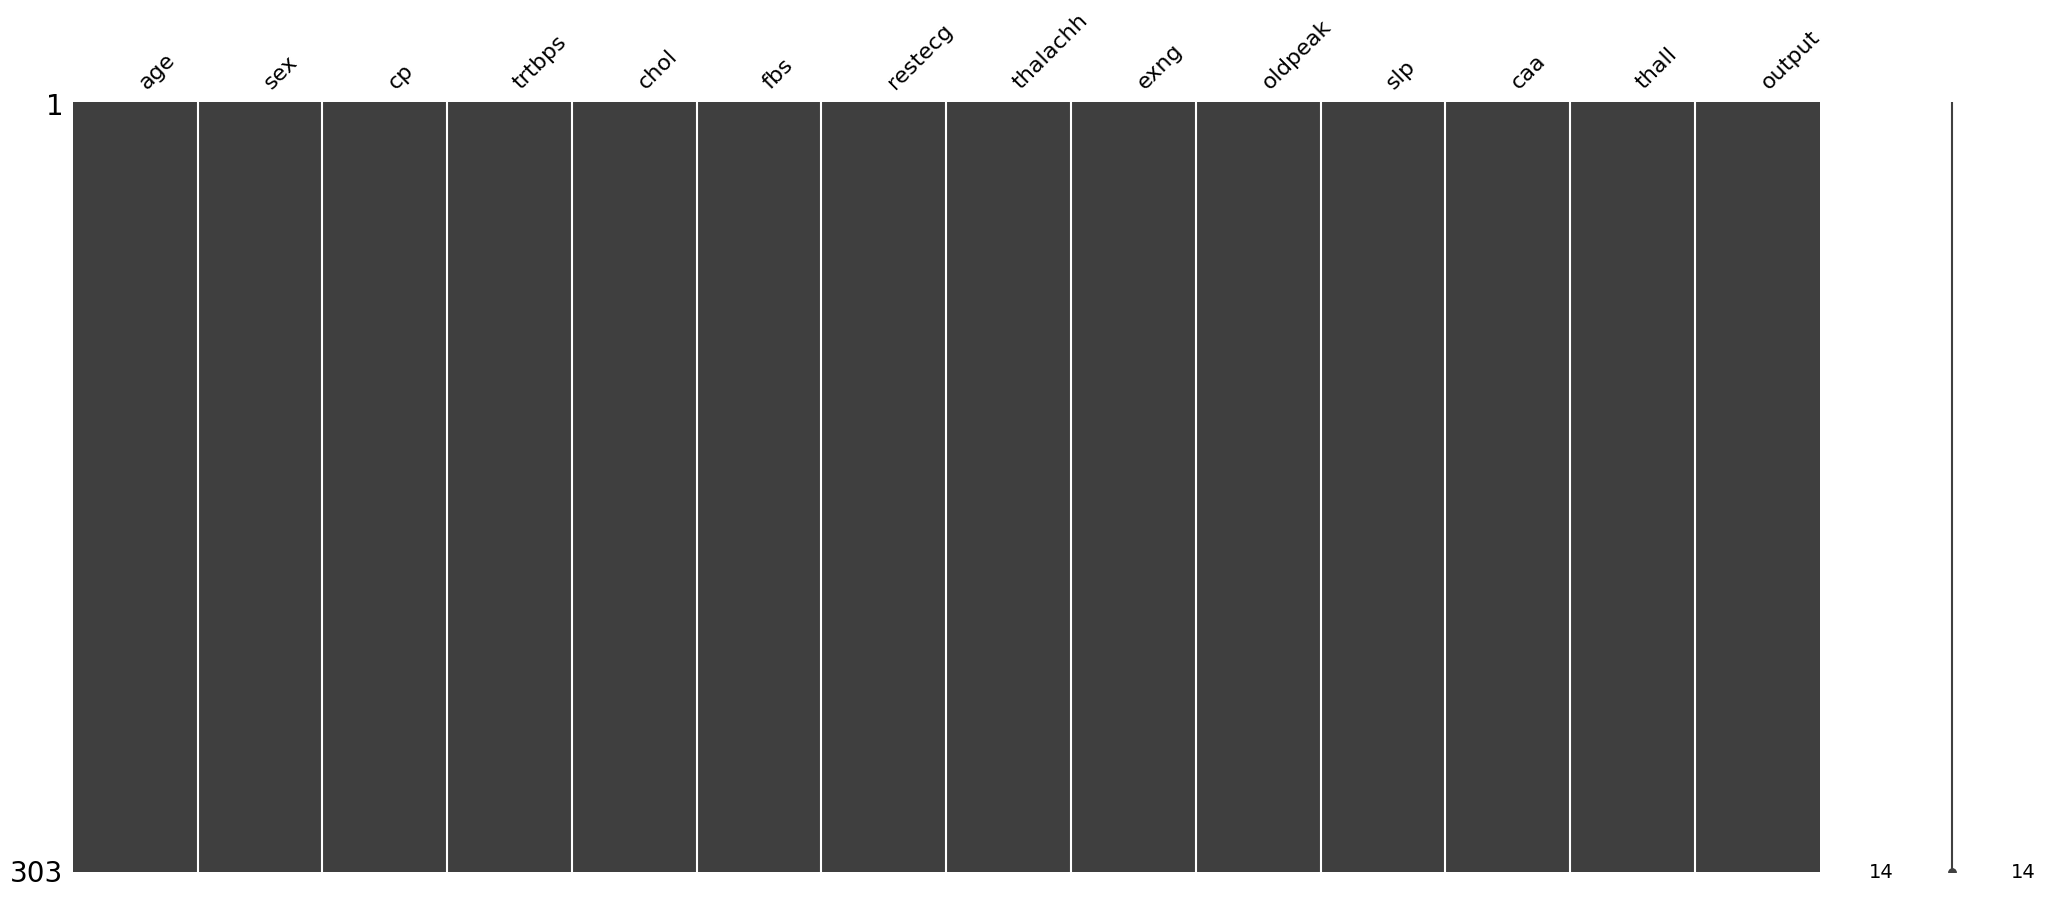

In [20]:
# Cek missing value
import missingno as msng
msng.matrix(df)
print('Missing value: ',df.isnull().sum().sum())

Tidak ada missing value atau data yang kosong

<Axes: xlabel='output', ylabel='count'>

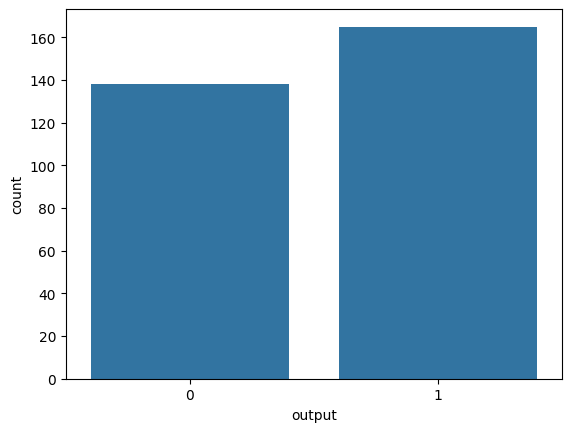

In [21]:
# Number of positive and negative classes
sns.countplot(x=df['output'])


Note: Dataset tidak seimbang dikarenakan lebih banyak data dengan label 1
*   0 = Tidak adanya  penyakit jantung
*   1 = Ada penyakit jantung

<Axes: xlabel='output', ylabel='count'>

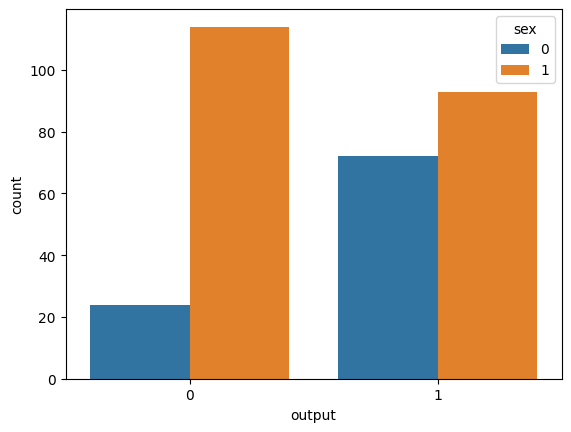

In [24]:
# percentage of female and male population with heart attack risk
sns.countplot(x='output', hue='sex', data=df)

<Axes: xlabel='cp', ylabel='count'>

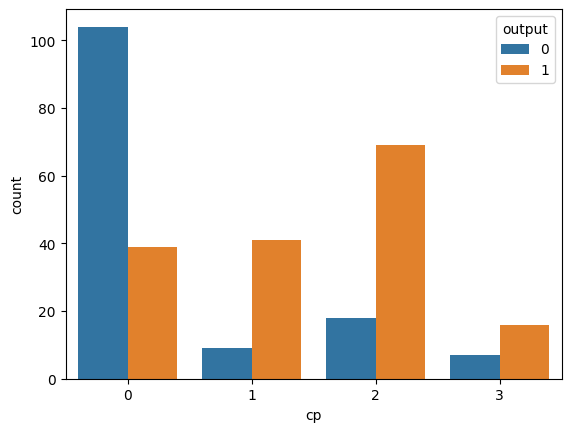

In [27]:
# Visualising chest pain classes subjected to low and high risk of heart attack
sns.countplot(x='cp', hue='output', data=df)


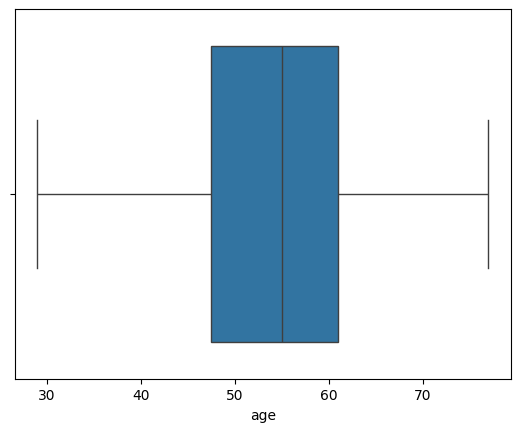

In [31]:
# sns.countplot(df['cp'],hue=df['output'])
sns.boxplot(df['age'],orient='h')
plt.show()

<ipython-input-32-8a367af0304a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])


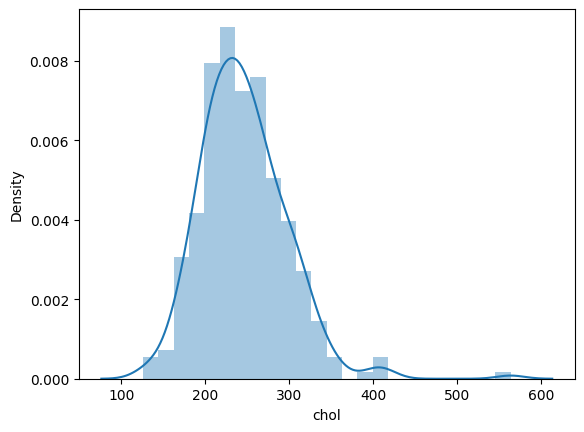

In [32]:
# Distribution of cholestrol feature
sns.distplot(df['chol'])
plt.show()

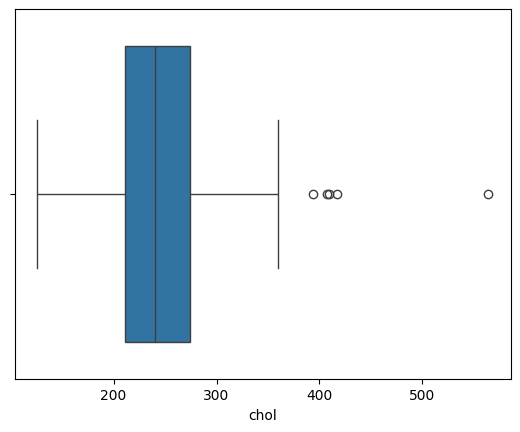

In [34]:
# To detect outliers in the cholestrol
sns.boxplot(df['chol'],orient='h')
plt.show()

Catatan:
Outlier ini tidak dapat dihilangkan karena kolestrol yang lebih tinggi dapat terjadi pada beberapa orang yang dapat menyebabkan risiko serangan jantung yang lebih tinggi, oleh karena itu tidak dapat dihilangkan.

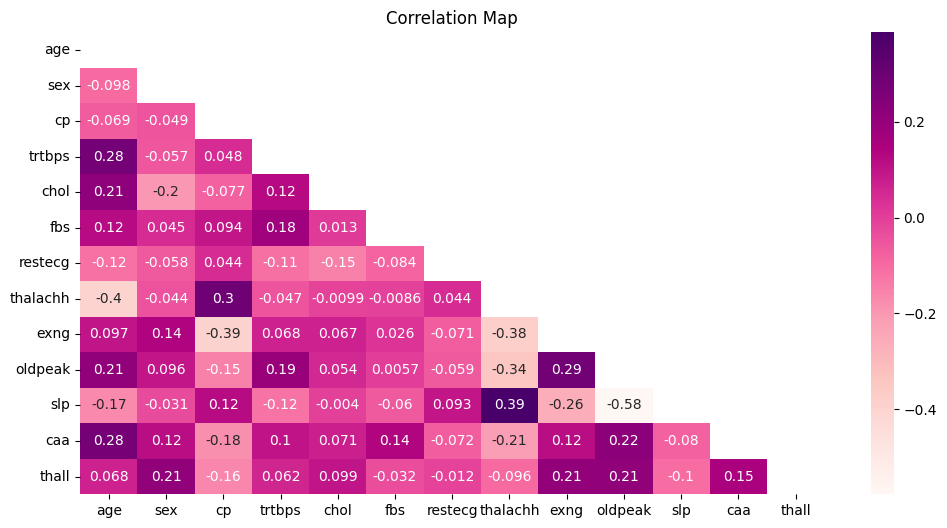

In [35]:
# Checking for multicolinearity
plt.figure(figsize=(12,6))
df2 = df.drop('output',axis=1)
corr = df2.corr()
matrix =  np.triu(np.ones_like(corr))

sns.heatmap(corr,annot=True,mask=matrix,cmap='RdPu')
plt.title('Correlation Map')
plt.show()

# **5. Pembagian Data**

In [36]:
X = df.values[:, :-1] # independen feature
y = df.values[:, -1] # dependen feature/ label

In [37]:
X[0:4]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ]])

In [38]:
y # Label/target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
from sklearn.model_selection import train_test_split

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
# n_features = X_train.shape[1]
# print(n_features)

(227, 13) (76, 13) (227,) (76,)


# **6. Artificial Neural Network**

## **6.1 Define the Model**

In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,))) #input layer
model.add(Dense(24, activation='relu')) #hidden layer
model.add(Dense(32, activation='relu')) #hidden layer
model.add(Dense(24, activation='relu')) #hidden layer
model.add(Dense(1, activation='sigmoid')) #output layer, biasanya dense output berdasarkan kategori

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 24)                264       
                                                                 
 dense_2 (Dense)             (None, 32)                800       
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **6.2 Compile the Model**

In [43]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
) #compile => proses mendeklarasikan optimizer, loss, dan metriks yang kita gunakan

## **6.3 Fit the Model**

In [44]:
model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 200, #jumlah latihan
    verbose=2
    ) #

Epoch 1/200
8/8 - 1s - loss: 1.9623 - accuracy: 0.4449 - 1s/epoch - 160ms/step
Epoch 2/200
8/8 - 0s - loss: 0.9653 - accuracy: 0.5374 - 18ms/epoch - 2ms/step
Epoch 3/200
8/8 - 0s - loss: 0.9087 - accuracy: 0.5374 - 19ms/epoch - 2ms/step
Epoch 4/200
8/8 - 0s - loss: 0.9520 - accuracy: 0.5507 - 19ms/epoch - 2ms/step
Epoch 5/200
8/8 - 0s - loss: 0.6978 - accuracy: 0.6256 - 19ms/epoch - 2ms/step
Epoch 6/200
8/8 - 0s - loss: 0.9013 - accuracy: 0.5242 - 19ms/epoch - 2ms/step
Epoch 7/200
8/8 - 0s - loss: 0.7099 - accuracy: 0.6300 - 19ms/epoch - 2ms/step
Epoch 8/200
8/8 - 0s - loss: 0.7119 - accuracy: 0.6123 - 18ms/epoch - 2ms/step
Epoch 9/200
8/8 - 0s - loss: 0.6409 - accuracy: 0.6300 - 20ms/epoch - 3ms/step
Epoch 10/200
8/8 - 0s - loss: 0.6282 - accuracy: 0.6344 - 20ms/epoch - 3ms/step
Epoch 11/200
8/8 - 0s - loss: 0.5929 - accuracy: 0.6608 - 19ms/epoch - 2ms/step
Epoch 12/200
8/8 - 0s - loss: 0.6410 - accuracy: 0.6520 - 19ms/epoch - 2ms/step
Epoch 13/200
8/8 - 0s - loss: 0.5998 - accuracy: 

## **6.4 Evaluate the Model**

In [45]:
oss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

3/3 - 0s - loss: 0.3584 - accuracy: 0.8816 - 173ms/epoch - 58ms/step
Test Accuracy: 0.8815789222717285


## **6.5 Make Prediction**

In [46]:
new_data = [57,	0,	1,	130,	236,	0,	0,	174,	0,	0.0,	1,	1,	2]

y_pred = model.predict([new_data])
# print(f'Predicted: {y_pred} (class = {argmax(y_pred)})')

class1 = argmax(y_pred)
if class1 == 0:
  print(f'Heart Disease, Akurasi Model Prediksi=> {y_pred}')
else:
  print(f'No Heart Disease, Akurasi Model Prediksi=> {y_pred}')

1/1 [==============================] - 0s 115ms/step
Heart Disease, Akurasi Model Prediksi=> [[0.8838187]]
